#TRAINING

#DATASET

In [76]:
!rm -rf /content/yolov5/dataset/train
!rm -rf /content/yolov5/dataset/valid
!rm -rf /content/yolov5/data/model.yaml
!rm -rf /content/test
!rm -rf /content/yolov5/runs/train/exp
!rm -rf /content/yolov5/runs/train/exp2
!rm -rf /content/yolov5/runs/train/exp3

In [ ]:
!curl -L "https://public.roboflow.com/ds/j3WOxPeVRi?key=4RhHJFfls7" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

#SETUP

In [ ]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

In [3]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 11742, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 11742 (delta 14), reused 29 (delta 11), pack-reused 11707
Receiving objects: 100% (11742/11742), 11.40 MiB | 24.32 MiB/s, done.
Resolving deltas: 100% (8114/8114), done.


In [6]:
%cd yolov5
!pip install -r requirements.txt

/content/yolov5
     |████████████████████████████████| 596 kB 5.2 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


#LIBRARIES

In [7]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

#TESTING PRETRAINED MODEL

In [8]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...

requirements: torch>=1.7.0 not found and is required by YOLOv5, attempting auto-update...

requirements: torchvision>=0.8.1 not found and is required by YOLOv5, attempting auto-update...

requirements: 3 packages updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2022-3-23 torch 1.8.1+cu111 CUDA:0 (Tesla K80, 11441MiB)



  0%|          | 0.00/14.1M [00:00<?, ?B/s]

Fusing layers... 


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs
Adding AutoShape... 


In [15]:
image = cv2.imread("/content/public_img.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [16]:
results = model(image)
results.print()

image 1/1: 533x800 2 persons, 28 cars, 5 trucks
Speed: 5.8ms pre-process, 29.8ms inference, 2.5ms NMS per image at shape (1, 3, 448, 640)


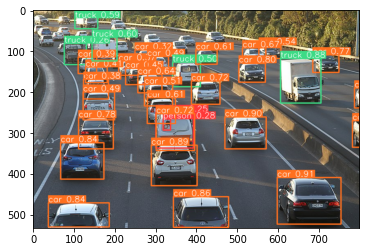

In [17]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
results.render()

#TRAINING ON THERMAL DATASET

In [78]:
%cd yolov5

/content/yolov5


In [79]:
!ls

CONTRIBUTING.md  Dockerfile  models	       runs	       utils
data		 export.py   __pycache__       setup.cfg       val.py
dataset		 hubconf.py  README.md	       train.py        yolov5
detect.py	 LICENSE     requirements.txt  tutorial.ipynb  yolov5s.pt


In [82]:
!python train.py --img 320 --batch 10 --epochs 100 --data data.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=10, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-60-gc3ae4e4 torch 1.8.1+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, 

#Training Part....